In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tsmoothie.smoother import GaussianSmoother
import spikeinterface
import spikeinterface.full as si

import helper_functions as helper
from spikeinterface.sorters import run_sorter_local

In [2]:
local_path= '/mnt/disk20tb/mandar/mandar_stims/240621/M08029/Network/000015/data.raw.h5' #network data from chip 16848


recording1 = si.read_maxwell(local_path,stream_id='well000')

#recording = si.ConcatenateSegmentRecording([recording1,recording2])
channel_ids = recording1.get_channel_ids()
fs = recording1.get_sampling_frequency()
num_chan = recording1.get_num_channels()
num_seg = recording1.get_num_segments()
total_recording = recording1.get_total_duration()

#end_time = int((total_recording-1))
start_time = 230
end_time = 430

#print('Channel ids:', channel_ids)
print('Sampling frequency:', fs)
print('Number of channels:', num_chan)
print('Number of segments:', num_seg)
print(f"total_recording: {total_recording} s")

recording_bp = si.bandpass_filter(recording1, freq_min=300, freq_max=3000)

recodring_cmr = si.common_reference(recording_bp, reference='global', operator='median')
#recording_chunk = recodring_cmr.frame_slice(start_frame= 1*fs,end_frame=425*fs)
recording_chunk = recodring_cmr.frame_slice(start_frame= start_time*fs,end_frame=end_time*fs)
#recording_chunk =si.scale(recording_chunk, gain=3.0)
print(f"chunk duration: {recording_chunk.get_total_duration()} s")

Sampling frequency: 10000.0
Number of channels: 990
Number of segments: 1
total_recording: 1799.98 s
chunk duration: 200.0 s


#Reading the file, BP filtering
#path of the network file
local_path= '/mnt/disk20tb/PrimaryNeuronData/Maxtwo/Folic_Acid_T2/Folic_Acid_T2/240123/M05506/ActivityScan/000001/data.raw.h5' #network data from chip 16848

recordings = list()
#recording1=se.read_maxwell(local_path,stream_id='well000',rec_name='rec0000')

for recname in ['rec0000', 'rec0001', 'rec0002', 'rec0003', 'rec0004', 'rec0005', 'rec0006']:
    recordings.append(se.read_maxwell(local_path,stream_id='well000',rec_name=recname)) #well000 - well005 for maxtwo 
recording1 = si.aggregate_channels(recordings)


#recording = si.ConcatenateSegmentRecording([recording1,recording2])
channel_ids = recording1.get_channel_ids()
fs = recording1.get_sampling_frequency()
num_chan = recording1.get_num_channels()
num_seg = recording1.get_num_segments()
total_recording = recording1.get_total_duration()

#print('Channel ids:', channel_ids)
print('Sampling frequency:', fs)
print('Number of channels:', num_chan)
print('Number of segments:', num_seg)
print(f"total_recording: {total_recording} s")

recording_bp = spre.bandpass_filter(recording1, freq_min=300, freq_max=3000)

recodring_cmr = spre.common_reference(recording_bp, reference='global', operator='median')
#recording_chunk = recodring_cmr.frame_slice(start_frame= 1*fs,end_frame=425*fs)
recording_chunk = recodring_cmr.frame_slice(start_frame= 0*fs,end_frame=30*fs)
print(f"chunk duration: {recording_chunk.get_total_duration()} s")

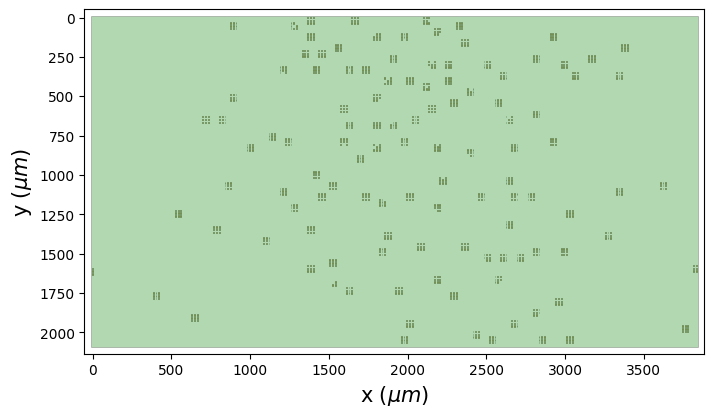

In [3]:
fig,ax = plt.subplots(figsize=(8,8))
si.plot_probe_map(recording1,ax=ax,with_channel_ids=False)
ax.invert_yaxis()

In [4]:
%matplotlib widget
si.plot_traces(recording=recording_chunk,backend="ipywidgets")

AppLayout(children=(TimeSlider(children=(Dropdown(description='segment', options=(0,), value=0), Button(icon='…

In [29]:
from helper_functions import detect_peaks
import numpy as np
import pandas as pd
import time

fs = 10000  # Sampling frequency
start_time = 1  # Start time in seconds
end_time =  1700  # End time in seconds
channel_list = recording_chunk.get_channel_ids()  # List of channel IDs
channel = 0  # Channel to analyze
# Define batch size and calculate total number of frames
batch_size = fs * 10  # Process 100 seconds of data at a time
total_frames = int((end_time - start_time) * fs)

traces = recording_chunk.get_traces(start_frame=start_time, end_frame=end_time, segment_index=0, return_scaled=False)
channel_index = np.where(channel_list == channel)[0][0]
x, y = detect_peaks(traces[:, channel_index], peak_sign="neg", abs_threshold=9)
print(f'Found {len(x)} peaks on channel {channel}.')



Processing frames 0 to 100000
Processing frames 100000 to 200000
Processing frames 200000 to 300000
Processing frames 300000 to 400000
Processing frames 400000 to 500000
Processing frames 500000 to 600000
Processing frames 600000 to 700000
Processing frames 700000 to 800000
Processing frames 800000 to 900000
Processing frames 900000 to 1000000
Processing frames 1000000 to 1100000
Processing frames 1100000 to 1200000
Processing frames 1200000 to 1300000
Processing frames 1300000 to 1400000
Processing frames 1400000 to 1500000
Processing frames 1500000 to 1600000
Processing frames 1600000 to 1700000
Processing frames 1700000 to 1800000
Processing frames 1800000 to 1900000
Processing frames 1900000 to 2000000
Processing frames 2000000 to 2100000
Processing frames 2100000 to 2200000
Processing frames 2200000 to 2300000
Processing frames 2300000 to 2400000
Processing frames 2400000 to 2500000
Processing frames 2500000 to 2600000
Processing frames 2600000 to 2700000
Processing frames 2700000

KeyboardInterrupt: 

In [37]:
from helper_functions import detect_peaks
import numpy as np
import pandas as pd
import time
from multiprocessing import Pool

fs = 10000  # Sampling frequency
start_time = 1  # Start time in seconds
end_time = 1700  # End time in seconds
channel_list = recording_chunk.get_channel_ids()  # List of channel IDs

# Define batch size and calculate total number of frames
batch_size = fs * 10  # Process 10 seconds of data at a time
total_frames = int((end_time - start_time) * fs)

# Function to process each batch
def process_batch(time_range):
    start_frame, end_frame = time_range
    try:
        print(f"Processing frames {start_frame} to {end_frame}")
        
        # Retrieve a batch of data
        traces = recording_chunk.get_traces(start_frame=start_frame, end_frame=end_frame, segment_index=0, return_scaled=False)
        
        
        
        # Collect peaks for each channel in this batch
        batch_peaks = {'Time Range': f"{start_frame} to {end_frame}"}
        for channel in channel_list:
            channel_index = np.where(channel_list == channel)[0][0]
            x, y = detect_peaks(traces[:, channel_index], peak_sign="neg", abs_threshold=9)
            batch_peaks[f'Channel {channel}'] = len(x)
        
       
        
        return batch_peaks

    except ValueError as e:
        print(f"Skipping range {start_frame} to {end_frame} due to error: {e}")
        return None  # Skip this batch if an error occurs

# Prepare time ranges
time_ranges = [(start, min(start + batch_size, total_frames)) for start in range(0, total_frames, batch_size) if start + batch_size <= total_frames]

# Use multiprocessing to process batches in parallel
with Pool(16) as pool:
    results = pool.map(process_batch, time_ranges)

# Filter out None results and extract valid results
valid_results = [result for result in results if result is not None]
peak_counts_df = pd.DataFrame([result[0] for result in valid_results])



# Save the DataFrame to an Excel file
peak_counts_df.to_excel('peak_counts.xlsx', index=False)


print("Peak counts have been saved to 'peak_counts.xlsx'.")

Processing frames 300000 to 400000Processing frames 0 to 100000Processing frames 900000 to 1000000Processing frames 600000 to 700000Processing frames 1200000 to 1300000Processing frames 2100000 to 2200000Processing frames 1800000 to 1900000Processing frames 1500000 to 1600000Processing frames 2700000 to 2800000
Processing frames 3000000 to 3100000
Processing frames 3300000 to 3400000Processing frames 2400000 to 2500000Processing frames 3600000 to 3700000Processing frames 3900000 to 4000000Processing frames 4200000 to 4300000


Processing frames 4500000 to 4600000










Processing frames 100000 to 200000
Processing frames 1000000 to 1100000
Processing frames 400000 to 500000
Processing frames 700000 to 800000
Processing frames 4600000 to 4700000
Processing frames 3400000 to 3500000
Processing frames 2800000 to 2900000
Processing frames 4300000 to 4400000
Processing frames 2200000 to 2300000
Processing frames 3100000 to 3200000
Processing frames 1600000 to 1700000
Processing frames 2

In [20]:
start_frame = 0
end_frame = 10000 *30
timestart = time.time()

traces = recording_chunk.get_traces(start_frame=start_frame, end_frame=end_frame, segment_index=0, return_scaled=False)
timestop =time.time()
print(f"Time taken to get traces: {timestop-timestart} s")

Time taken to get traces: 15.342143058776855 s


In [7]:
print(x)

[863 907]


In [8]:
print([start_time + i/fs for i in x])

[7.886299999999999, 7.8907]


In [9]:
print(len(channel_list))
print(traces.shape)

990
(1500, 990)


Experimental for future.

In [40]:
import concurrent.futures
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
from numba import cuda
from helper_functions import detect_peaks
# Assume fs, recording_chunk, traces are defined elsewhere

peak_sign = "neg"
abs_threshold = 10
interval_length = 30 * fs
total_length = 1740 * fs
channel_list = recording_chunk.get_channel_ids()
channels_to_process = channel_list
traces = recording_chunk.get_traces(start_frame=0, end_frame=int(total_length), segment_index=0, return_scaled=False)
results = {}



def count_peaks_in_intervals_cpu(peaks, interval_length, total_length):
    intervals = np.arange(0, total_length, interval_length)
    counts = []

    for start in intervals:
        end = start + interval_length
        count = np.sum((peaks >= start) & (peaks < end))
        counts.append(count)

    return counts

def process_channel_cpu(channel_data, peak_sign, abs_threshold, interval_length, total_length):
    peaks, _ = detect_peaks(channel_data, peak_sign, abs_threshold)
    peak_counts = count_peaks_in_intervals_cpu(peaks, interval_length, total_length)
    return peak_counts

@cuda.jit
def count_peaks_in_intervals_gpu(peaks, interval_length, total_length, counts):
    idx = cuda.grid(1)
    if idx < counts.size:
        start = idx * interval_length
        end = start + interval_length
        count = 0
        for i in range(peaks.size):
            if start <= peaks[i] < end:
                count += 1
        counts[idx] = count

def process_channel_gpu(channel_data, peak_sign, abs_threshold, interval_length, total_length):
    import cupy as cp
    peaks, _ = detect_peaks(channel_data, peak_sign, abs_threshold)
    peaks_gpu = cp.array(peaks)
    interval_count = (total_length + interval_length - 1) // interval_length
    counts_gpu = cp.zeros(interval_count, dtype=cp.int32)
    
    threads_per_block = 256
    blocks_per_grid = (interval_count + threads_per_block - 1) // threads_per_block
    
    count_peaks_in_intervals_gpu[blocks_per_grid, threads_per_block](peaks_gpu, interval_length, total_length, counts_gpu)
    peak_counts = cp.asnumpy(counts_gpu)
    return peak_counts

def is_gpu_available():
    try:
        import cupy
        return cupy.cuda.runtime.getDeviceCount() > 0
    except Exception:
        return False

use_gpu = is_gpu_available()

with concurrent.futures.ThreadPoolExecutor() as executor:
    futures = {
        executor.submit(
            process_channel_gpu if use_gpu else process_channel_cpu,
            traces[:, np.where(channel_list == channel)[0][0]],
            peak_sign, abs_threshold, interval_length, total_length
        ): channel
        for channel in channels_to_process
    }

for future in concurrent.futures.as_completed(futures):
    channel = futures[future]
    try:
        peak_counts = future.result()
        results[channel] = peak_counts
    except Exception as exc:
        print(f'Channel {channel} generated an exception: {exc}')

# Calculate the correct number of intervals
num_intervals = (total_length + interval_length - 1) // interval_length

# Generate column names
column_names = [f'({i}, {i + interval_length})' for i in range(0, num_intervals * interval_length, interval_length)]

# Create DataFrame and save to Excel
df = pd.DataFrame.from_dict(results, orient='index')
df.columns = column_names[:df.shape[1]]  # Ensure the correct number of columns
df.index.name = 'Channel'
df.to_excel('peak_counts.xlsx')

: 

## RUnnig sorting

In [18]:
traces = recording_chunk.get_traces(start_frame=100, end_frame=50000*15, segment_index=0,return_scaled=True)


KeyboardInterrupt: 

In [8]:
traces = recording_chunk.get_traces(start_frame=306000, end_frame=311000, segment_index=0,return_scaled=False)
plt.figure(figsize=(30,2))
plt.plot(traces[:,899])
#plt.savefig('/home/mmp/Documents/traces/fulltrace_wt.svg',format='svg',dpi=600)
plt.show()

IndexError: index 899 is out of bounds for axis 1 with size 587

<Figure size 3000x200 with 0 Axes>

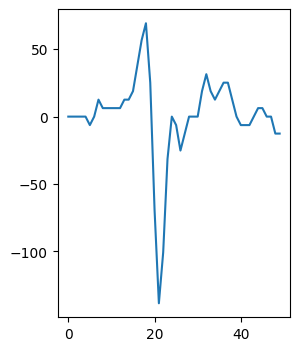

In [70]:
traces = recording_chunk.get_traces(start_frame=278860, end_frame=278910, segment_index=0,return_scaled=True)
plt.figure(figsize=(3,4))
plt.plot(traces[:,500])
plt.savefig('/home/mmp/Documents/traces/zoomedin.svg',format='svg')
plt.show()

In [55]:
default_KS2_params = ss.get_default_sorter_params('kilosort2')
print(default_KS2_params)
# default_KS2_params['keep_good_only'] = True
# default_KS2_params['detect_threshold'] = 12
# default_KS2_params['projection_threshold']=[18, 10]
# default_KS2_params['preclust_threshold'] = 8
run_sorter = ss.run_sorter('kilosort2',recording=recording_chunk, output_folder="./sorting/aggrgated_channels", docker_image= "rohanmalige/rohan_si-100:v1",verbose=True, **default_KS2_params)

## if running on NERSC:
#run_sorter_local("kilosort2",recording_chunk, output_folder="./sorting/FolicAcid10mg", delete_output_folder=False,verbose=True,with_output=True,**default_KS2_params)
#run_sorter = ss.run_sorter('kilosort2',recording= recording_chunk, output_folder="/mnt/disk15tb/mmpatil/Spikesorting/sorter_output/kilosort2",docker_image= True,verbose=True, **default_KS2_params)

{'detect_threshold': 6, 'projection_threshold': [10, 4], 'preclust_threshold': 8, 'momentum': [20.0, 400.0], 'car': True, 'minFR': 0.1, 'minfr_goodchannels': 0.1, 'freq_min': 150, 'sigmaMask': 30, 'lam': 10.0, 'nPCs': 3, 'ntbuff': 64, 'nfilt_factor': 4, 'NT': None, 'AUCsplit': 0.9, 'wave_length': 61, 'keep_good_only': False, 'skip_kilosort_preprocessing': False, 'scaleproc': None, 'save_rez_to_mat': False, 'delete_tmp_files': ('matlab_files',), 'delete_recording_dat': False, 'n_jobs': 48, 'chunk_duration': '1s', 'progress_bar': True, 'mp_context': None, 'max_threads_per_process': 1}
installation_mode='auto' switching to installation_mode: 'github'
Starting container
Running kilosort2 sorter inside rohanmalige/rohan_si-100:v1


In [67]:

# loading the KS2 sorted object
sortingKS3 = run_sorter.remove_empty_units()
sortingKS3 = spikeinterface.curation.remove_excess_spikes(sortingKS3,recording_chunk) #Sometimes KS returns spikes outside the number of samples. < https://github.com/SpikeInterface/spikeinterface/pull/1378>

sortingKS3= sortingKS3.save(folder = './sorting/RETT_organoid_16876_KS2')
#sorting_KS3 = s.Kilosort2Sorter._get_result_from_folder('./sorting/FolicAcidT2M07038_2_KS/sorter_output')
total_units = sortingKS3.get_unit_ids()
print(len(total_units))
#print(len(total_units))
channel_ids = recording_chunk.get_channel_ids()
print(channel_ids)

230
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15'
 '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29'
 '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43'
 '44' '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55' '56' '57'
 '58' '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69' '70' '71'
 '72' '73' '74' '75' '76' '77' '78' '79' '80' '81' '82' '83' '84' '85'
 '86' '87' '88' '89' '90' '91' '92' '93' '94' '95' '96' '97' '98' '99'
 '100' '101' '102' '103' '104' '105' '106' '107' '108' '109' '110' '111'
 '112' '113' '114' '115' '116' '117' '118' '119' '120' '121' '122' '123'
 '124' '125' '126' '127' '128' '129' '130' '131' '132' '133' '134' '135'
 '136' '137' '138' '139' '140' '141' '142' '143' '144' '145' '146' '147'
 '148' '149' '150' '151' '152' '153' '154' '155' '156' '157' '158' '159'
 '160' '161' '162' '163' '164' '165' '166' '167' '168' '169' '170' '171'
 '172' '173' '174' '175' '176' '177' '178' '179' '180' '181' 

/home/mmp/.local/lib/python3.10/site-packages/spikeinterface/core/basesorting.py:239: UserWarning: The registered recording will not be persistent on disk, but only available in memory
  warnings.warn("The registered recording will not be persistent on disk, but only available in memory")


## Extracting the waveforms

In [68]:

job_kwargs = dict(n_jobs=32, chunk_duration="1s", progress_bar=True)
#waveforms = si.extract_waveforms(recording_chunk,sorting_KS3,folder="./waveformsblock1_7min",overwrite=True, ms_before=1., ms_after=2.,**job_kwargs)
waveforms = si.extract_waveforms(recording_chunk,sortingKS3,folder='./sorting/RETT_organoid_16876_waveforms',overwrite=True,**job_kwargs)
print(waveforms)

extract waveforms shared_memory multi buffer:   0%|          | 0/180 [00:00<?, ?it/s]

extract waveforms shared_memory multi buffer:   0%|          | 0/180 [00:00<?, ?it/s]

extract waveforms memmap multi buffer:   0%|          | 0/180 [00:00<?, ?it/s]

WaveformExtractor: 996 channels - 230 units - 1 segments
  before:20 after:40 n_per_units:500 - sparse


In [1]:
print('hello')

hello


In [ ]:
sorter = si.sorters._get_res

In [6]:
waveforms = si.load_waveforms('/mnt/disk15tb/adam/git_workspace/MEA_Analysis/AxonReconPipeline/data/temp_data/waveforms/240118/M06844/AxonTracking/000026/well001/waveforms/',with_recording=False)

ValueError: This WaveformExtractor folder was created with an older version of spikeinterface
You cannot use the mode with_recording=False

In [69]:
si.export_to_phy(waveform_extractor=waveforms,output_folder='./sorting/RETT_organoid_16876_phy',**job_kwargs)

write_binary_recording:   0%|          | 0/180 [00:00<?, ?it/s]

extract amplitudes:   0%|          | 0/180 [00:00<?, ?it/s]

Fitting PCA:   0%|          | 0/230 [00:00<?, ?it/s]

Projecting waveforms:   0%|          | 0/230 [00:00<?, ?it/s]

extract PCs:   0%|          | 0/180 [00:00<?, ?it/s]

Run:
phy template-gui  /mnt/disk15tb/mmpatil/MEA_Analysis/IPNAnalysis/sorting/RETT_organoid_16876_phy/params.py


In [70]:
extremum_channels_ids =si.get_template_extremum_channel(waveforms,peak_sign ='both',mode='at_index')

In [71]:
template = waveforms.get_template(5,mode='median')
template.shape

(60, 18)

In [72]:

job_kwargs = dict(n_jobs=16, chunk_duration="1s", progress_bar=True)
sp.compute_spike_amplitudes(waveforms,load_if_exists=True,**job_kwargs)
metrics = qm.compute_quality_metrics(waveforms,load_if_exists=False,**job_kwargs)

/home/mmp/.local/lib/python3.10/site-packages/spikeinterface/qualitymetrics/misc_metrics.py:1221: UserWarning: Amplitude PDF does not have a unique minimum! More spikes might be required for a correct amplitude_cutoff computation!
  warnings.warn(
/home/mmp/.local/lib/python3.10/site-packages/spikeinterface/qualitymetrics/misc_metrics.py:848: UserWarning: Units [2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 17, 18, 20, 23, 24, 26, 29, 31, 32, 35, 36, 37, 40, 41, 42, 46, 47, 49, 50, 51, 52, 53, 54, 55, 57, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 74, 76, 77, 78, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 94, 97, 98, 103, 104, 105, 106, 107, 108, 109, 111, 112, 114, 115, 116, 117, 120, 122, 123, 124, 125, 127, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 141, 143, 144, 149, 150, 151, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 167, 168, 169, 170, 171, 172, 174, 175, 177, 181, 182, 185, 186, 187, 190, 191, 193, 194, 196, 197, 198, 199, 203, 204, 205, 208, 209, 210, 212, 213, 214, 

  0%|          | 0/230 [00:00<?, ?it/s]

/home/mmp/.local/lib/python3.10/site-packages/spikeinterface/qualitymetrics/pca_metrics.py:227: RuntimeWarning: Degrees of freedom <= 0 for slice
  VI = np.linalg.inv(np.cov(pcs_for_this_unit.T))
/home/mmp/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/mmp/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/home/mmp/.local/lib/python3.10/site-packages/spikeinterface/qualitymetrics/pca_metrics.py:227: RuntimeWarning: Degrees of freedom <= 0 for slice
  VI = np.linalg.inv(np.cov(pcs_for_this_unit.T))
/home/mmp/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/mmp/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: invalid value encounter

In [73]:
display(metrics)

,amplitude_cutoff,amplitude_cv_median,amplitude_cv_range,amplitude_median,firing_range,firing_rate,isi_violations_ratio,isi_violations_count,num_spikes,presence_ratio,...,snr,sync_spike_2,sync_spike_4,sync_spike_8,d_prime,isolation_distance,l_ratio,silhouette,nn_hit_rate,nn_miss_rate
2,NaN,NaN,NaN,188.827515,0.75,0.200000,0.000000,0.0,36.0,0.666667,...,19.485260,0.305556,0.000000,0.0,8.051448,4.111621e+15,NaN,0.390869,0.798611,0.002859
3,0.111070,0.205898,0.089645,31.471252,9.40,3.805556,0.383611,3.0,685.0,1.000000,...,inf,0.140146,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,18.882751,3.90,2.361111,0.664360,2.0,425.0,1.000000,...,2.205976,0.089412,0.000000,0.0,2.579497,7.794434e+01,0.489470,0.065355,0.534706,0.082265
5,NaN,NaN,NaN,31.471252,6.70,1.788889,50.923961,88.0,322.0,1.000000,...,2.987026,0.232919,0.003106,0.0,8.483622,2.187090e+02,0.000838,0.079625,0.333075,0.001374
6,NaN,NaN,NaN,69.236755,3.20,1.277778,0.000000,0.0,230.0,1.000000,...,7.466300,0.334783,0.013043,0.0,8.531018,6.112089e+02,0.018635,0.114556,0.871739,0.022306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,NaN,NaN,NaN,12.588501,4.05,1.677778,1.315732,2.0,302.0,1.000000,...,1.114471,0.102649,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN
243,NaN,NaN,NaN,18.882751,3.65,1.505556,4.901894,6.0,271.0,1.000000,...,inf,0.173432,0.000000,0.0,2.401139,1.083300e+02,0.582101,0.015986,0.140221,0.011869
244,0.019193,0.374915,0.128513,12.588501,9.55,4.783333,0.000000,0.0,861.0,1.000000,...,1.496018,0.082462,0.002323,0.0,4.120534,1.701023e+02,0.220279,0.014447,0.413000,0.007576
245,NaN,NaN,NaN,18.882751,4.05,1.644444,0.684806,1.0,296.0,1.000000,...,inf,0.246622,0.003378,0.0,2.879367,6.517055e+01,0.367859,0.057058,0.349662,0.057201


In [74]:
import mea_analysis_pipeline as msp

In [75]:
import importlib
importlib.reload(msp)
update_qual_metrics = msp.remove_violated_units(metrics)
non_violated_units  = update_qual_metrics.index.values

In [76]:
print(len(non_violated_units))

102


In [77]:
units_location_info = {unit_id: location for unit_id, location in zip(waveforms.unit_ids, si.compute_unit_locations(waveforms))}



In [78]:
print(units_location_info)

{2: array([2.88416350e+03, 8.91451784e+02, 2.27382133e+00]), 3: array([4.73777283e+01, 1.06317901e+03, 1.06120838e+00]), 4: array([ 78.39834354, 956.24562632,   1.62597047]), 5: array([3.04284107e+03, 1.17139693e+03, 1.52921202e+00]), 6: array([-16.4061341 , 792.58138342,   1.25256172]), 7: array([ 83.02338755, 754.7811818 ,   1.02561723]), 8: array([3.60500044e+03, 1.17316693e+03, 3.46952601e+00]), 9: array([3605.        , 1173.92448759,    3.99948914]), 10: array([3.72705528e+03, 1.20823731e+03, 2.66917847e+00]), 11: array([3.81902958e+03, 6.40457447e+02, 1.50512198e+00]), 12: array([1151.50537629, 1104.20610228,   24.62991997]), 13: array([1152.86716273, 1098.05448538,   17.62573999]), 14: array([1160.64584021, 1096.07050683,   32.20931845]), 15: array([3.12245417e+03, 1.24013701e+03, 1.00000000e+00]), 16: array([3.12186557e+03, 1.09895859e+03, 1.39565818e+00]), 17: array([247.00934146, 860.97009032,   5.8250559 ]), 18: array([2.93561698e+03, 8.18240628e+02, 1.63444097e+00]), 20: ar

<Figure size 1200x800 with 0 Axes>

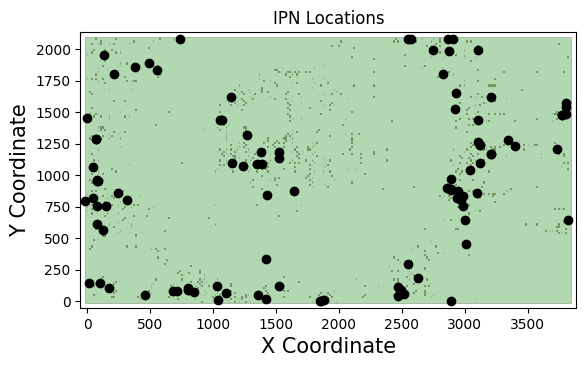

In [83]:
import pickle

plt.figure(figsize=(12, 8))
# try:
#     with open('/mnt/disk15tb/mmpatil/MEA_Analysis/IPNAnalysis/network_1020.pkl', 'rb') as file:
#         loaded_units_info = pickle.load(file)
# except EOFError as e:
#     print("Error loading the file:", e)
#     loaded_units_info = {}
loaded_units_info = {}
# Check if loaded_units_info is not empty
if loaded_units_info:
    # Extract x and y coordinates from the loaded dictionary
    x_coords_loaded = [location[0] for location in loaded_units_info.values()]
    y_coords_loaded = [location[1] for location in loaded_units_info.values()]

    # Plotting
      # Adjusts the figure size
    plt.scatter(x_coords_loaded, y_coords_loaded, marker='o',label='Network-1020')  # Uses red for distinct visualization

# Filter units_info to include only those units present in non_violated_units
filtered_units_info = {unit_id: units_location_info[unit_id] for unit_id in non_violated_units if unit_id in units_location_info}
# Save the filtered units info as a JSON file

# Extract x and y coordinates from the filtered dictionary
x_coords = [location[0] for location in filtered_units_info.values()]
y_coords = [location[1] for location in filtered_units_info.values()]

# Plotting
 # Adjusts the figure size
sw.plot_probe_map(recording_chunk,with_channel_ids=False)
plt.scatter(x_coords, y_coords, marker='o',color ='black',label='Neuronal_units')  # Plots the locations as points

# Optional: Enhancements for readability
plt.title('IPN Locations')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
#plt.legend()
plt.savefig("./network_comparison_combined.png",format='png')
#plt.grid(True)  # Adds a grid for easier visualization

plt.show()

In [13]:
job_kwargs = dict(n_jobs=48, chunk_duration="1s", progress_bar=True)
sparsity = spikeinterface.core.compute_sparsity(waveforms ,method="radius", radius_um=40)
export_to_phy(waveform_extractor=waveforms, output_folder='/mnt/disk15tb/mmpatil/MEA_Analysis/IPNAnalysis/sorting/M07038_phy',sparsity=sparsity,**job_kwargs)

write_binary_recording:   0%|          | 0/180 [00:00<?, ?it/s]

extract PCs:   0%|          | 0/180 [00:00<?, ?it/s]

Run:
phy template-gui  /mnt/disk15tb/mmpatil/MEA_Analysis/IPNAnalysis/sorting/M07038_phy/params.py


In [83]:
display(update_qual_metrics)

,num_spikes,firing_rate,presence_ratio,snr,isi_violations_ratio,isi_violations_count,rp_contamination,rp_violations,sliding_rp_violation,amplitude_cutoff,amplitude_median
0,713.0,3.961111,1.0,inf,0.0,0.0,0.0,0.0,0.045,0.030143,44.059753
1,815.0,4.527778,1.0,inf,0.0,0.0,0.0,0.0,0.035,0.005110,50.354004
9,1201.0,6.672222,1.0,inf,0.0,0.0,0.0,0.0,0.015,0.007593,182.533264
10,1300.0,7.222222,1.0,inf,0.0,0.0,0.0,0.0,0.015,0.006564,56.648254
13,1960.0,10.888889,1.0,inf,0.0,0.0,0.0,0.0,0.010,0.001716,37.765503
...,...,...,...,...,...,...,...,...,...,...,...
1076,742.0,4.122222,1.0,inf,0.0,0.0,0.0,0.0,0.105,0.005122,81.825256
1077,784.0,4.355556,1.0,inf,0.0,0.0,0.0,0.0,0.035,0.001359,107.002258
1078,877.0,4.872222,1.0,inf,0.0,0.0,0.0,0.0,0.080,0.032251,56.648254
1079,1178.0,6.544444,1.0,inf,0.0,0.0,0.0,0.0,0.025,0.016931,59.795380


In [7]:
print(non_violated_units)

[   0    1    9   10   13   14   19   26   27   29   34   41   47   48
   50   52   54   55   56   57   60   61   62   66   69   70   71   76
   77   83   84   85   90   91   92   93   96   97  101  103  104  105
  106  107  116  117  119  120  123  126  133  138  140  141  142  143
  149  154  157  158  159  160  164  165  166  175  178  181  182  187
  190  198  202  210  211  216  217  221  222  224  226  230  231  232
  233  234  239  240  242  243  249  252  254  257  259  262  280  293
  294  297  303  304  309  310  311  313  315  319  320  322  323  329
  330  331  333  334  335  338  351  354  355  358  359  366  371  373
  374  379  380  381  395  396  397  400  408  409  413  415  417  419
  421  422  423  428  431  435  436  438  439  446  453  459  465  470
  472  474  480  485  486  489  490  493  494  499  500  509  514  517
  523  524  525  531  537  540  541  542  546  547  552  554  556  557
  558  562  569  570  576  577  578  583  585  586  592  595  600  602
  604 

In [85]:
len(non_violated_units)

380

In [8]:
waveform_good = waveforms.select_units(non_violated_units,new_folder='./sorting/FolicAcidT2M07038_2_waveformsgood/')

In [9]:
correlograms, bins = sp.compute_correlograms(waveform_good)

In [23]:
correlograms.shape

(380, 380, 20)

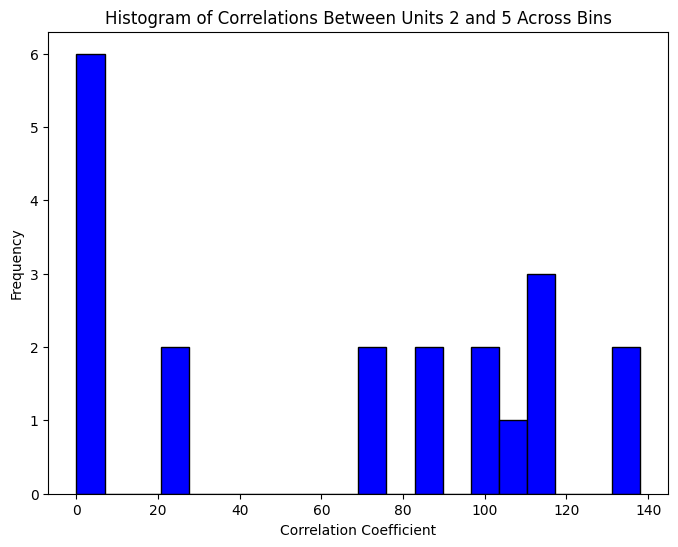

In [22]:
import matplotlib.pyplot as plt

# Extracting the correlation values between units 2 and 5 across all bins
# Adjusting indices for 0-based Python indexing
correlations = correlograms[2, 2, :]

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.hist(correlations, bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Correlations Between Units 2 and 5 Across Bins')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Frequency')
plt.show()

In [12]:
bins

array([-50., -45., -40., -35., -30., -25., -20., -15., -10.,  -5.,   0.,
         5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.])

In [10]:
metrics = qm.compute_quality_metrics(waveform_good,load_if_exists=False,**job_kwargs)

/home/mmp/.local/lib/python3.10/site-packages/spikeinterface/qualitymetrics/misc_metrics.py:232: RuntimeWarning: divide by zero encountered in scalar divide
  snrs[unit_id] = np.abs(amplitude) / noise


In [11]:
display(metrics)

,num_spikes,firing_rate,presence_ratio,snr,isi_violations_ratio,isi_violations_count,rp_contamination,rp_violations,sliding_rp_violation,amplitude_cutoff,amplitude_median
7,806.0,4.477778,1.0,inf,0.000000,0.0,0.000000,0.0,0.185,0.116709,635.719299
9,676.0,3.755556,1.0,inf,0.000000,0.0,0.000000,0.0,0.185,0.000383,88.119507
15,644.0,3.577778,1.0,inf,0.000000,0.0,0.000000,0.0,0.055,0.017724,81.825256
17,935.0,5.194444,1.0,inf,0.000000,0.0,0.000000,0.0,0.045,0.002369,62.942505
32,839.0,4.661111,1.0,inf,0.000000,0.0,0.000000,0.0,0.085,0.000525,75.531006
...,...,...,...,...,...,...,...,...,...,...,...
546,513.0,2.850000,1.0,inf,0.000000,0.0,0.000000,0.0,0.080,0.001561,44.059753
548,1253.0,6.961111,1.0,inf,0.076433,2.0,0.122104,2.0,0.155,0.000859,50.354004
549,621.0,3.450000,1.0,inf,0.000000,0.0,0.000000,0.0,0.180,0.000568,37.765503
552,613.0,3.405556,1.0,inf,0.319345,2.0,0.795147,2.0,0.320,0.000670,44.059753


In [12]:
waveform_good = None

In [13]:
waveform_good = si.load_waveforms('./sorting/waveformsgood_Folicacid10mg/')

In [14]:
metrics = qm.compute_quality_metrics(waveform_good,load_if_exists=False,**job_kwargs)

/home/mmp/.local/lib/python3.10/site-packages/spikeinterface/qualitymetrics/misc_metrics.py:232: RuntimeWarning: divide by zero encountered in scalar divide
  snrs[unit_id] = np.abs(amplitude) / noise


In [15]:
display(metrics)

,num_spikes,firing_rate,presence_ratio,snr,isi_violations_ratio,isi_violations_count,rp_contamination,rp_violations,sliding_rp_violation,amplitude_cutoff,amplitude_median
7,806.0,4.477778,1.0,inf,0.000000,0.0,0.000000,0.0,0.185,0.116709,635.719299
9,676.0,3.755556,1.0,inf,0.000000,0.0,0.000000,0.0,0.185,0.000383,88.119507
15,644.0,3.577778,1.0,inf,0.000000,0.0,0.000000,0.0,0.055,0.017724,81.825256
17,935.0,5.194444,1.0,inf,0.000000,0.0,0.000000,0.0,0.045,0.002369,62.942505
32,839.0,4.661111,1.0,inf,0.000000,0.0,0.000000,0.0,0.085,0.000525,75.531006
...,...,...,...,...,...,...,...,...,...,...,...
546,513.0,2.850000,1.0,inf,0.000000,0.0,0.000000,0.0,0.080,0.001561,44.059753
548,1253.0,6.961111,1.0,inf,0.076433,2.0,0.122104,2.0,0.155,0.000859,50.354004
549,621.0,3.450000,1.0,inf,0.000000,0.0,0.000000,0.0,0.180,0.000568,37.765503
552,613.0,3.405556,1.0,inf,0.319345,2.0,0.795147,2.0,0.320,0.000670,44.059753


<class 'numpy.ndarray'>


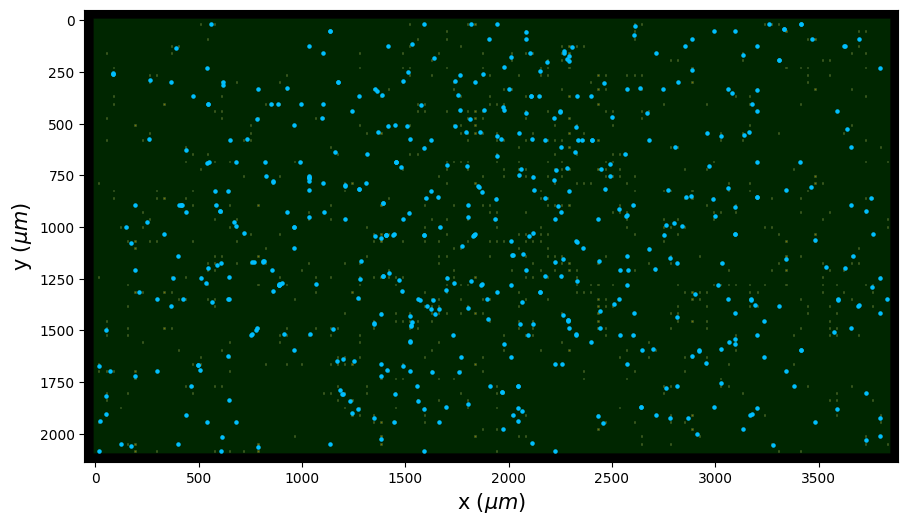

In [14]:

#locations = sp.compute_unit_locations(waveforms)
locations = sp.compute_unit_locations(waveforms)
print(type(locations))

#np.savetxt("unitloc_10mins.txt",locations)
fig,ax = plt.subplots(figsize=(10.5,6.5))
sw.plot_probe_map(recording1,ax=ax,with_channel_ids=False)
ax.set_facecolor('#000000') 
for x,y in locations:
    ax.scatter(x,y, s=5,c='deepskyblue')
ax.invert_yaxis()
plt.savefig(f'/home/mmp/Documents/FolicAcid_T2/M05506_6/unit_locations.svg',format='svg')